In [1]:
import math
import numpy as np
from matplotlib import pyplot as pt
%matplotlib inline

# Complex numbers in Python

In [2]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (3+3j)
The type of the variable is  <class 'complex'>


In [3]:
(2.75+3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

In [4]:
1.4*np.exp(5.32*1j)

(0.79927078585823497-1.1494199453957457j)

In [5]:
(7.51-9.15*1j)/(4.43+9.64*1j)

(-0.4880897698448308-1.0033441577191493j)

# Shapes created by the Joukowski transformation

In [6]:
#using polar coordinate for r & theta
theta = np.linspace(0,2*np.pi, 100)
R = 1.5
c = 1
z = R*np.exp(theta*1j)
xi = z+c**2/z

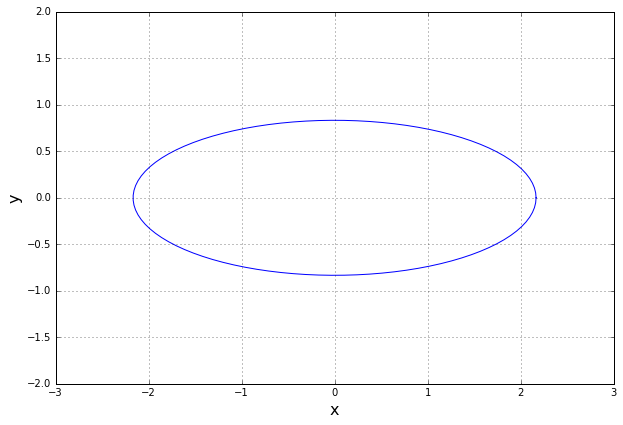

In [7]:
size = 10
x_start, x_end = -3, 3
y_start, y_end = -2, 2
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It becomes an ellipse on xi plane.

In [8]:
R = 1.2
c = 1
z = (c-R+R*np.cos(theta) + R*1j*np.sin(theta))
#circle centered at (c−R,0)
xi = z+c**2/z

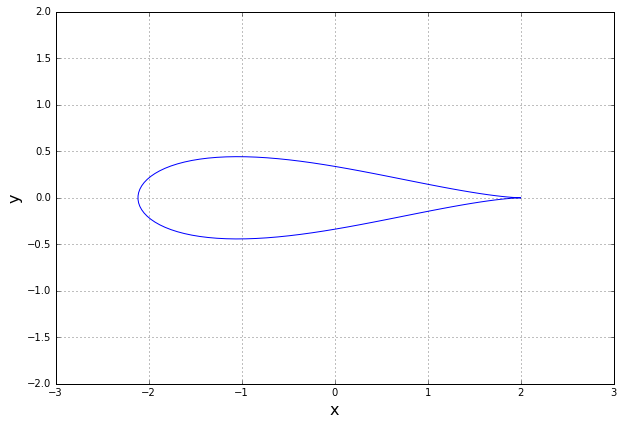

In [9]:
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It now becomes a symmetric airfoil.

In [10]:
delta_x = 0.1
delta_y = 0.1
c = 1
R = math.sqrt((c-delta_x)**2 + delta_y**2)
z = (-delta_x+R*np.cos(theta) + (delta_y+R*np.sin(theta))*1j)
#circle centered at (-delta_x,delta_y)
xi = z+c**2/z

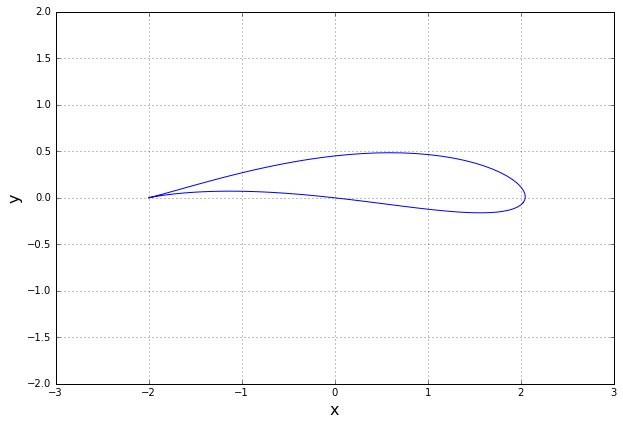

In [11]:
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It now looks like a cambered airfoil.

# Grid points on the z-plane using polar coordinates

In [12]:
Nr = 100
Ntheta = 145
R = 1.15
c = 1
r = np.linspace(c, 5, Nr)
theta = np.linspace(0, 2*np.pi, Ntheta)
RR, THETA = np.meshgrid(r, theta)
z = (-0.15+RR*np.cos(THETA) + RR*1j*np.sin(THETA)) + 0.15*np.exp(THETA*1j)
#cylinder centered at (−0.15,0)

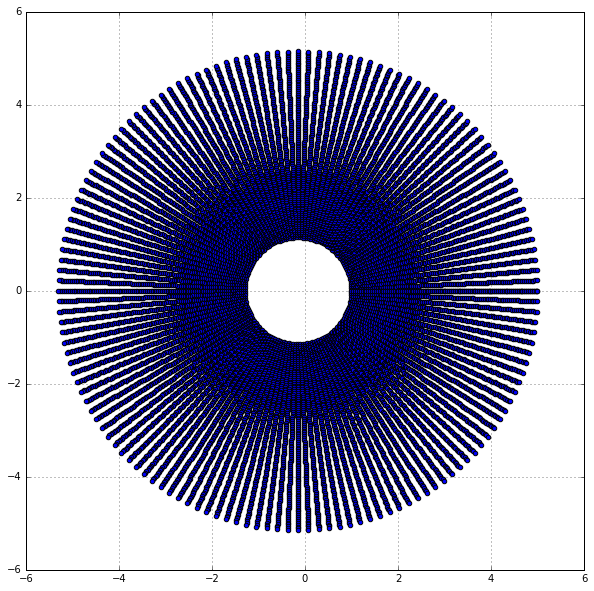

In [13]:
#plot the grids on z plane
size = 10
x_start, x_end = -6, 6
y_start, y_end = -6, 6
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.scatter(z.real, z.imag)
#z.real & z.imag represent the grid points now

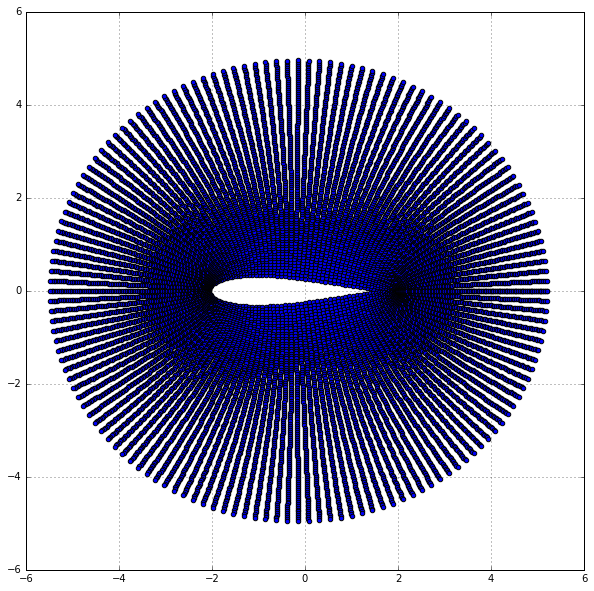

In [14]:
xi = z+c**2/z
#plot the grids on xi plane
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.scatter(xi.real, xi.imag)

# Flow over a symmetric Joukowski airfoil with zero angle of attack

Stream function and streamlines


In [16]:
u_inf = 1
kappa = 2*np.pi*R**2*u_inf
#For cylinder radius Radius, a doublet of strength kappa is needed.
x_doublet, y_doublet = -0.15, 0

In [17]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2   
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)   
    return psi

In [18]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, z.real, z.imag)
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, z.real, z.imag)
u_freestream = u_inf * np.ones((Ntheta, Nr), dtype=float)
v_freestream = np.zeros((Ntheta, Nr), dtype=float)
psi_freestream = u_inf * z.imag

In [19]:
#superposition
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

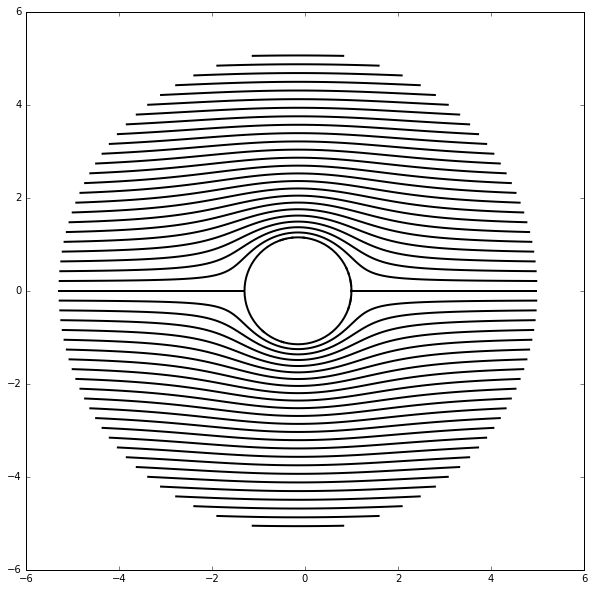

In [33]:
# plot the streamlines on z plane
size = 10
z0 = (-0.15+R*np.cos(theta) + R*1j*np.sin(theta))
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.contour(z.real, z.imag, psi, levels = np.linspace(-10,10,101), colors='Black', linewidths=2, linestyles='solid')
pt.plot(z0.real, z0.imag, color='Black', linewidth=2)
#a trick to fix the uncontinued line at level=0

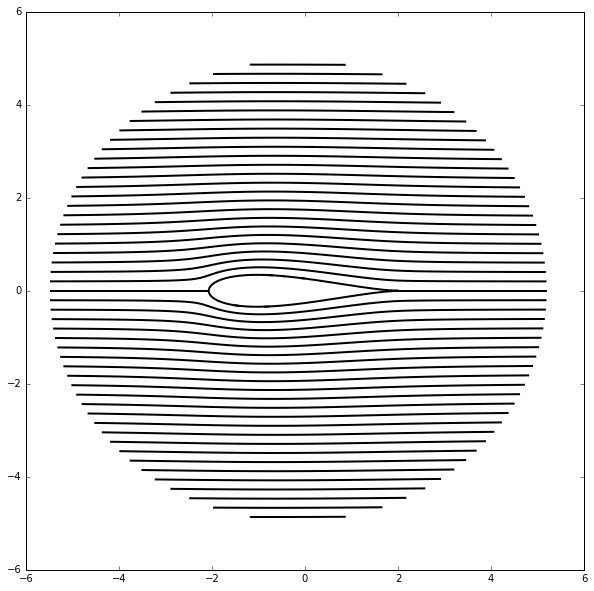

In [35]:
# plot the streamlines on xi plane
size = 10
xi0 = z0+c**2/z0
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.contour(xi.real, xi.imag, psi, levels = np.linspace(-10,10,101), colors='Black', linewidths=2, linestyles='solid')
pt.plot(xi0.real, xi0.imag, color='Black', linewidth=2)

Velocity vectors and pressure coefficients

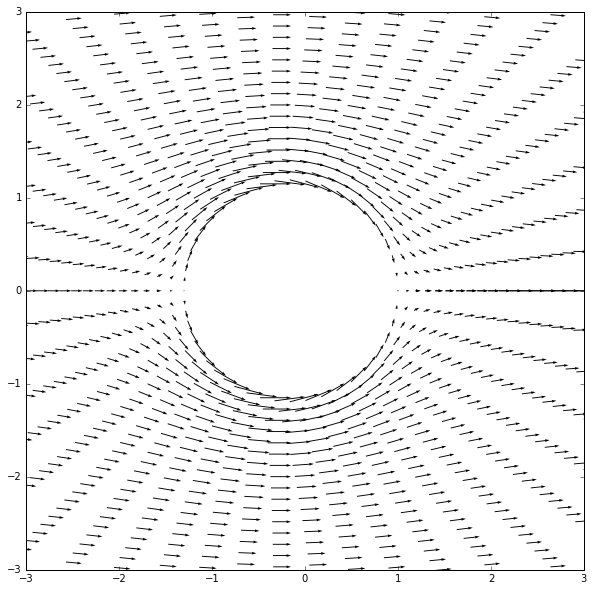

In [51]:
#plot the velocity vector on z plane
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.xlim(x_start/2, x_end/2)
pt.ylim(y_start/2, y_end/2)
pt.quiver(z.real[::3, ::3], z.imag[::3, ::3], u[::3, ::3], v[::3, ::3], width=0.01, scale=6, units='xy', pivot='tip')

Note: Warning was raised as an exception.



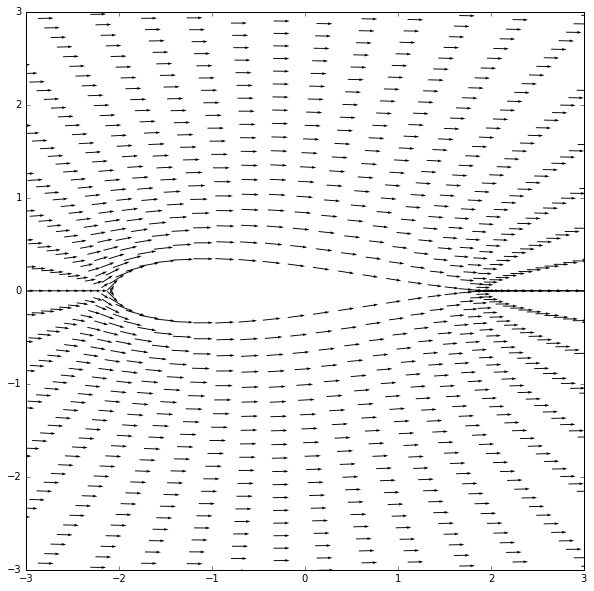

In [62]:
w = (u-v*1j)/(1-(c/z)**2) # W(xi) according to the calculation
import warnings
warnings.filterwarnings('error')
try:
    warnings.warn(Warning())
except Warning:
    print('Note: Warning was raised as an exception.\n') #ignore warning for invalid value encountered in true_divide
#plot the velocity vector on  plane
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.xlim(x_start/2, x_end/2)
pt.ylim(y_start/2, y_end/2)
pt.quiver(xi.real[::3, ::3], xi.imag[::3, ::3], w.real[::3, ::3], -w.imag[::3, ::3], width=0.01, scale=6, units='xy', pivot='tip')

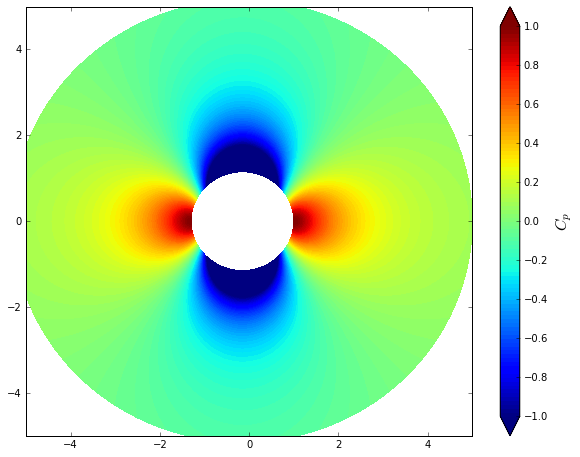

In [76]:
cp_z = 1.0 - (u**2+v**2)/u_inf**2
#plot the pressure coeffient on z plane
size = 10
x_start, x_end = -5, 5
y_start, y_end = -5, 5
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size/1.3))
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
contourf = pt.contourf(z.real, z.imag, cp_z, levels=np.linspace(-1, 1, 101), extend='both')
cbar = pt.colorbar(contourf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.linspace(-1, 1, 11))

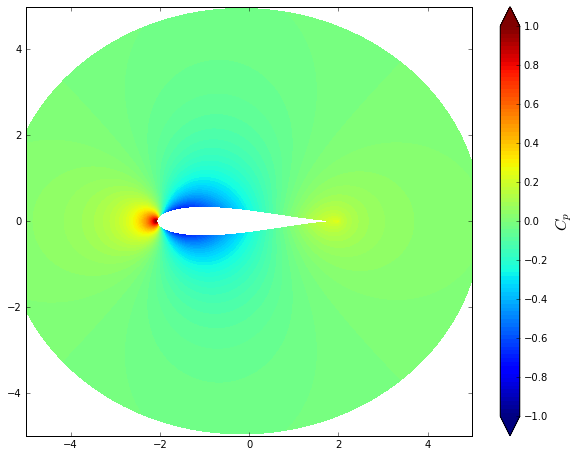

In [78]:
cp_xi = 1.0 - (w.real**2+w.imag**2)/u_inf**2
#plot the pressure coeffient on xi plane
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size/1.3))
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
contourf = pt.contourf(xi.real, xi.imag, cp_xi, levels=np.linspace(-1, 1, 101), extend='both')
cbar = pt.colorbar(contourf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(np.linspace(-1, 1, 11))

Exercise Questions

In [80]:
print('The strength of the doublet is')
kappa

The strength of the doublet is


8.309512568745001

In [81]:
print('The velocity at 62nd point on the airfoil surface is')
w[61,0]

The velocity at 62nd point on the airfoil surface is


(1.1063384662852433-0.52363334929849636j)

In [89]:
print('The minimum value of the pressure coefficient on the airfoil surface is')
cp_xi[0,0] = 1 #ignore cp_xi[0,0] when finding minimum value since by setting value 1, since value of cp_xi[0,0] is nan.
np.amin(cp_xi)

The minimum value of the pressure coefficient on the airfoil surface is


-0.68775567409240423

# Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [ ]:
aoa = 20/180*np.pi